About Dataset
Context
This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

Content
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

Note that this data set was modified from this dataset by John D here. It has been cleaned up for the purposes of classification.

In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

## EDA & FEature Engenering

In [2]:
data = pd.read_csv("Airline Passenger Satisfaction.csv")

In [3]:
# Remove Useless columns
data.drop(["Unnamed: 0","id"],axis=1,inplace=True)

In [4]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
data.tail()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,3,1,1,1,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [6]:
data.shape

(103904, 23)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [8]:
## Check null values 
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [9]:
# Fill nan value with median
data["Arrival Delay in Minutes"] = data["Arrival Delay in Minutes"].fillna(np.nanmedian(data["Arrival Delay in Minutes"]))

In [10]:
# Now Check duplicet values
data.duplicated().sum()

0

In [11]:
# Saprate numerical and catigorical data
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude ="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')
Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')


In [12]:
# check unique values in catigorical data 
for i in catigorical_features:
    print(i,data[i].unique())
    print("="*60)

Gender ['Male' 'Female']
Customer Type ['Loyal Customer' 'disloyal Customer']
Type of Travel ['Personal Travel' 'Business travel']
Class ['Eco Plus' 'Business' 'Eco']
satisfaction ['neutral or dissatisfied' 'satisfied']


In [13]:
for i in catigorical_features:
    print(i,data[i].value_counts())
    print("="*60)

Gender Female    52727
Male      51177
Name: Gender, dtype: int64
Customer Type Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64
Type of Travel Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64
Class Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64
satisfaction neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64


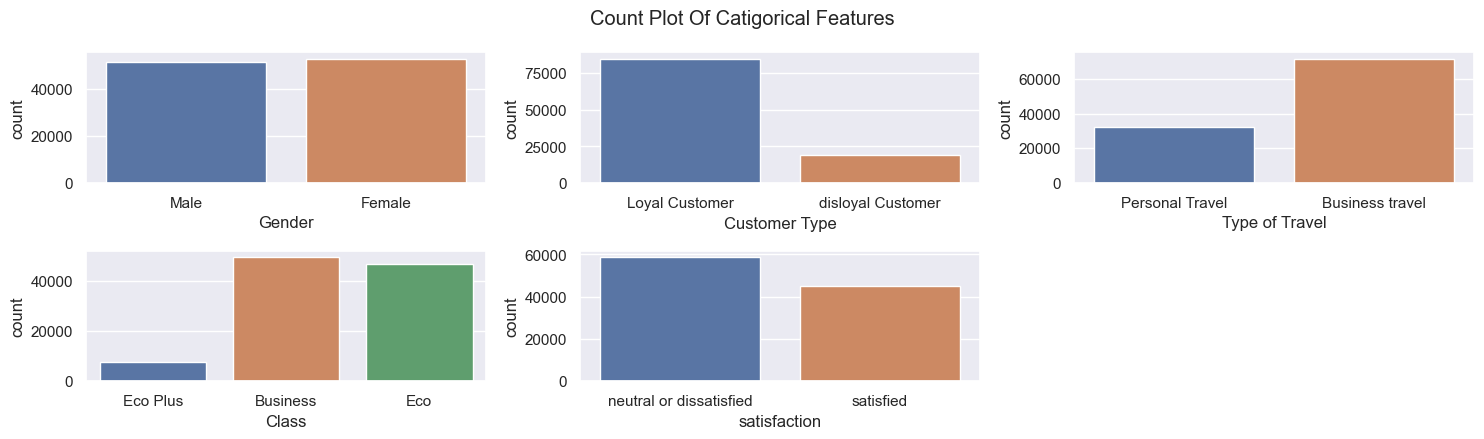

In [14]:
try:
    plt.suptitle("Count Plot Of Catigorical Features")
    for i in range(0,len(catigorical_features)):
        plt.subplot(3,3,i+1)
        sns.countplot(x = data[catigorical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

<AxesSubplot:ylabel='satisfaction'>

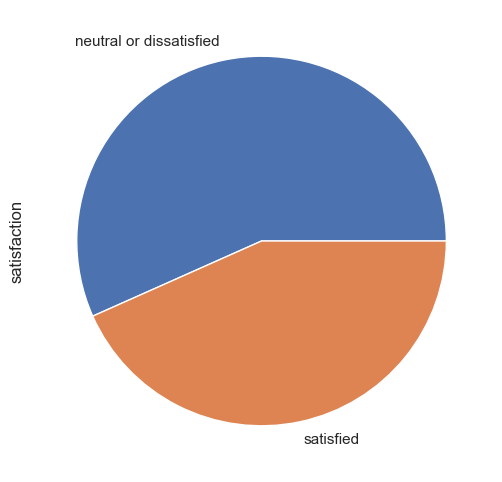

In [15]:
data["satisfaction"].value_counts().plot.pie()

<AxesSubplot:xlabel='Gender'>

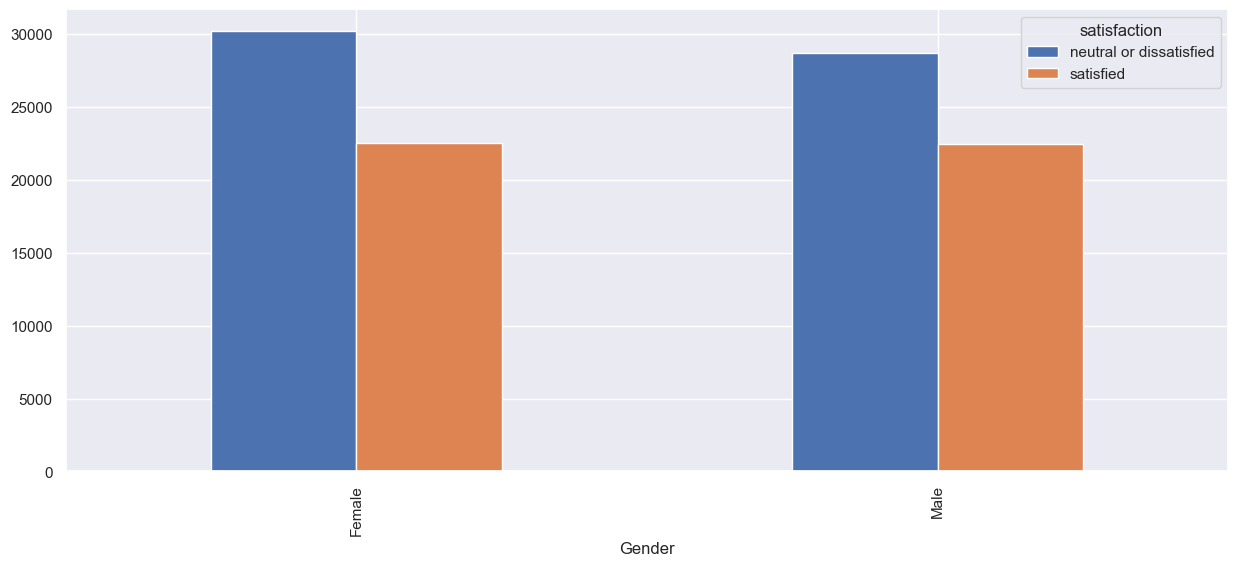

In [16]:
# compare with gender and satisfaction
gender = pd.crosstab(data["Gender"],data["satisfaction"])
gender.plot(kind="bar")

<AxesSubplot:xlabel='Customer Type'>

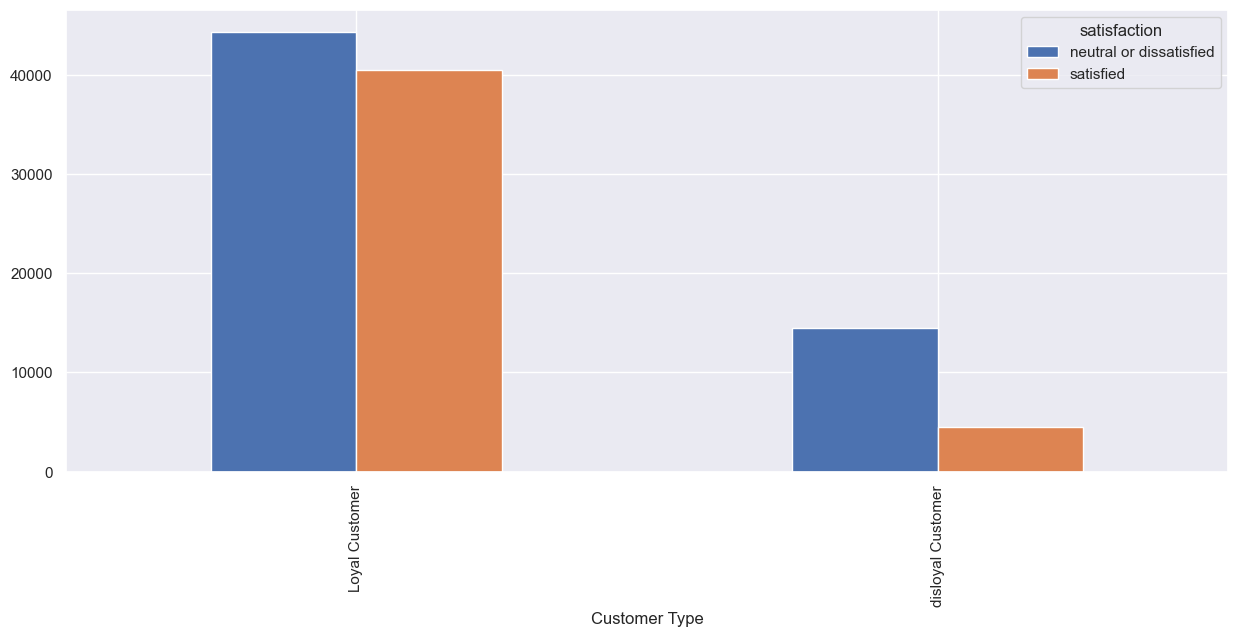

In [17]:
# compare with Customer Type and satisfaction
Customer_Type = pd.crosstab(data["Customer Type"],data["satisfaction"])
Customer_Type.plot(kind="bar")

<AxesSubplot:xlabel='Type of Travel'>

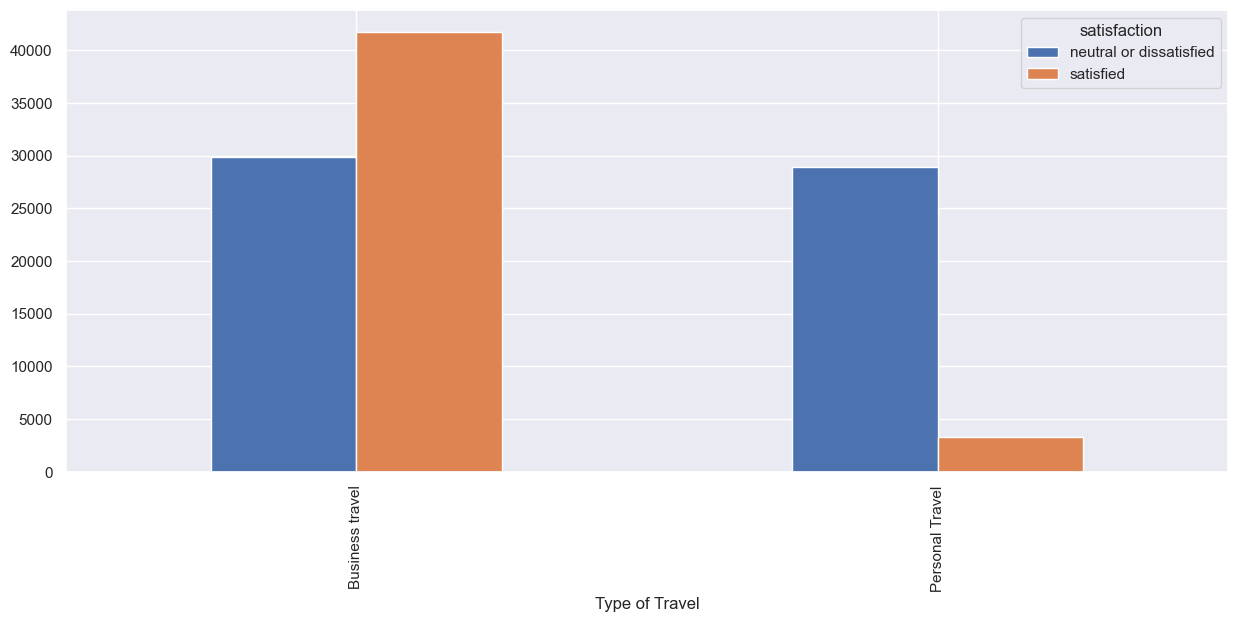

In [18]:
# compare with Type of Travel and satisfaction
TypeofTravel = pd.crosstab(data["Type of Travel"],data["satisfaction"])
TypeofTravel.plot(kind="bar")

<AxesSubplot:xlabel='Class'>

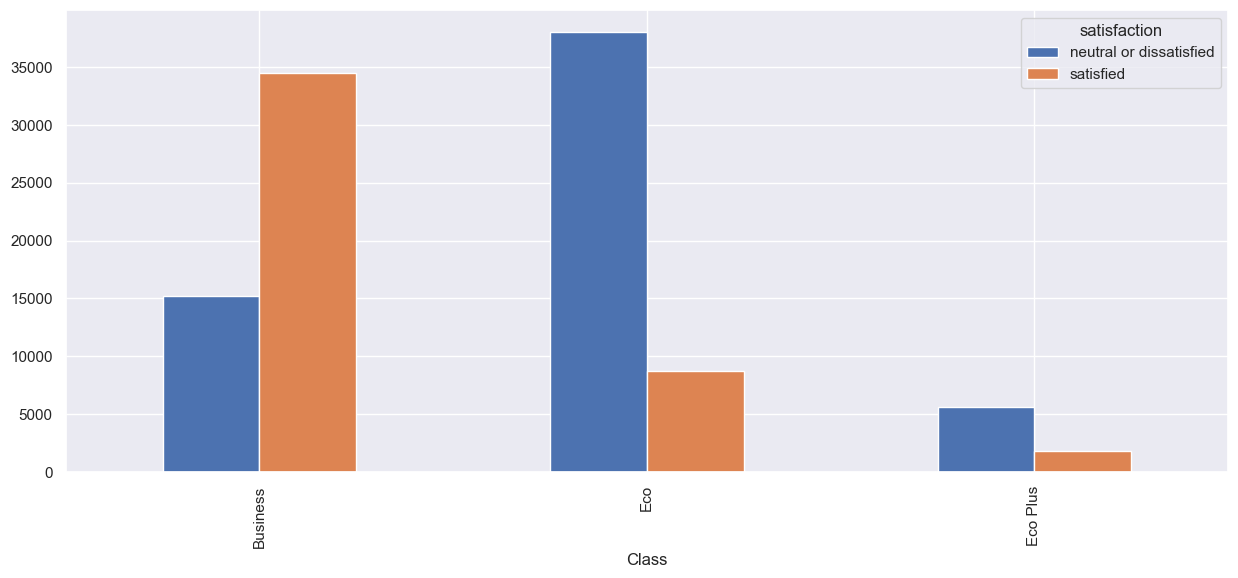

In [19]:
# compare with Class and satisfaction
Class = pd.crosstab(data["Class"],data["satisfaction"])
Class.plot(kind="bar")

In [20]:
# convert target feature in to binary
data["satisfaction"] = data["satisfaction"].map({'neutral or dissatisfied':0, 'satisfied':1})

In [21]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392,0.433333
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776,0.495538
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


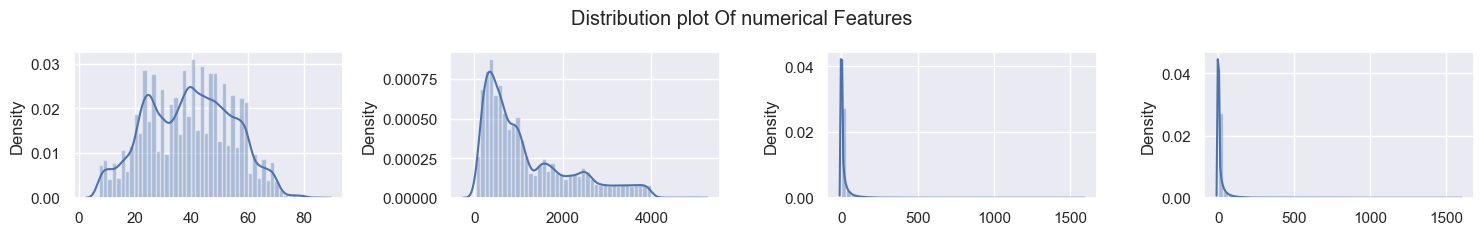

In [22]:
num = ['Age','Flight Distance','Arrival Delay in Minutes','Departure Delay in Minutes']
try:
    plt.suptitle("Distribution plot Of numerical Features")
    for i in range(0,len(num)):
        plt.subplot(3,4,i+1)
        sns.distplot(x = data[num[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

num must be 1 <= num <= 15, not 16


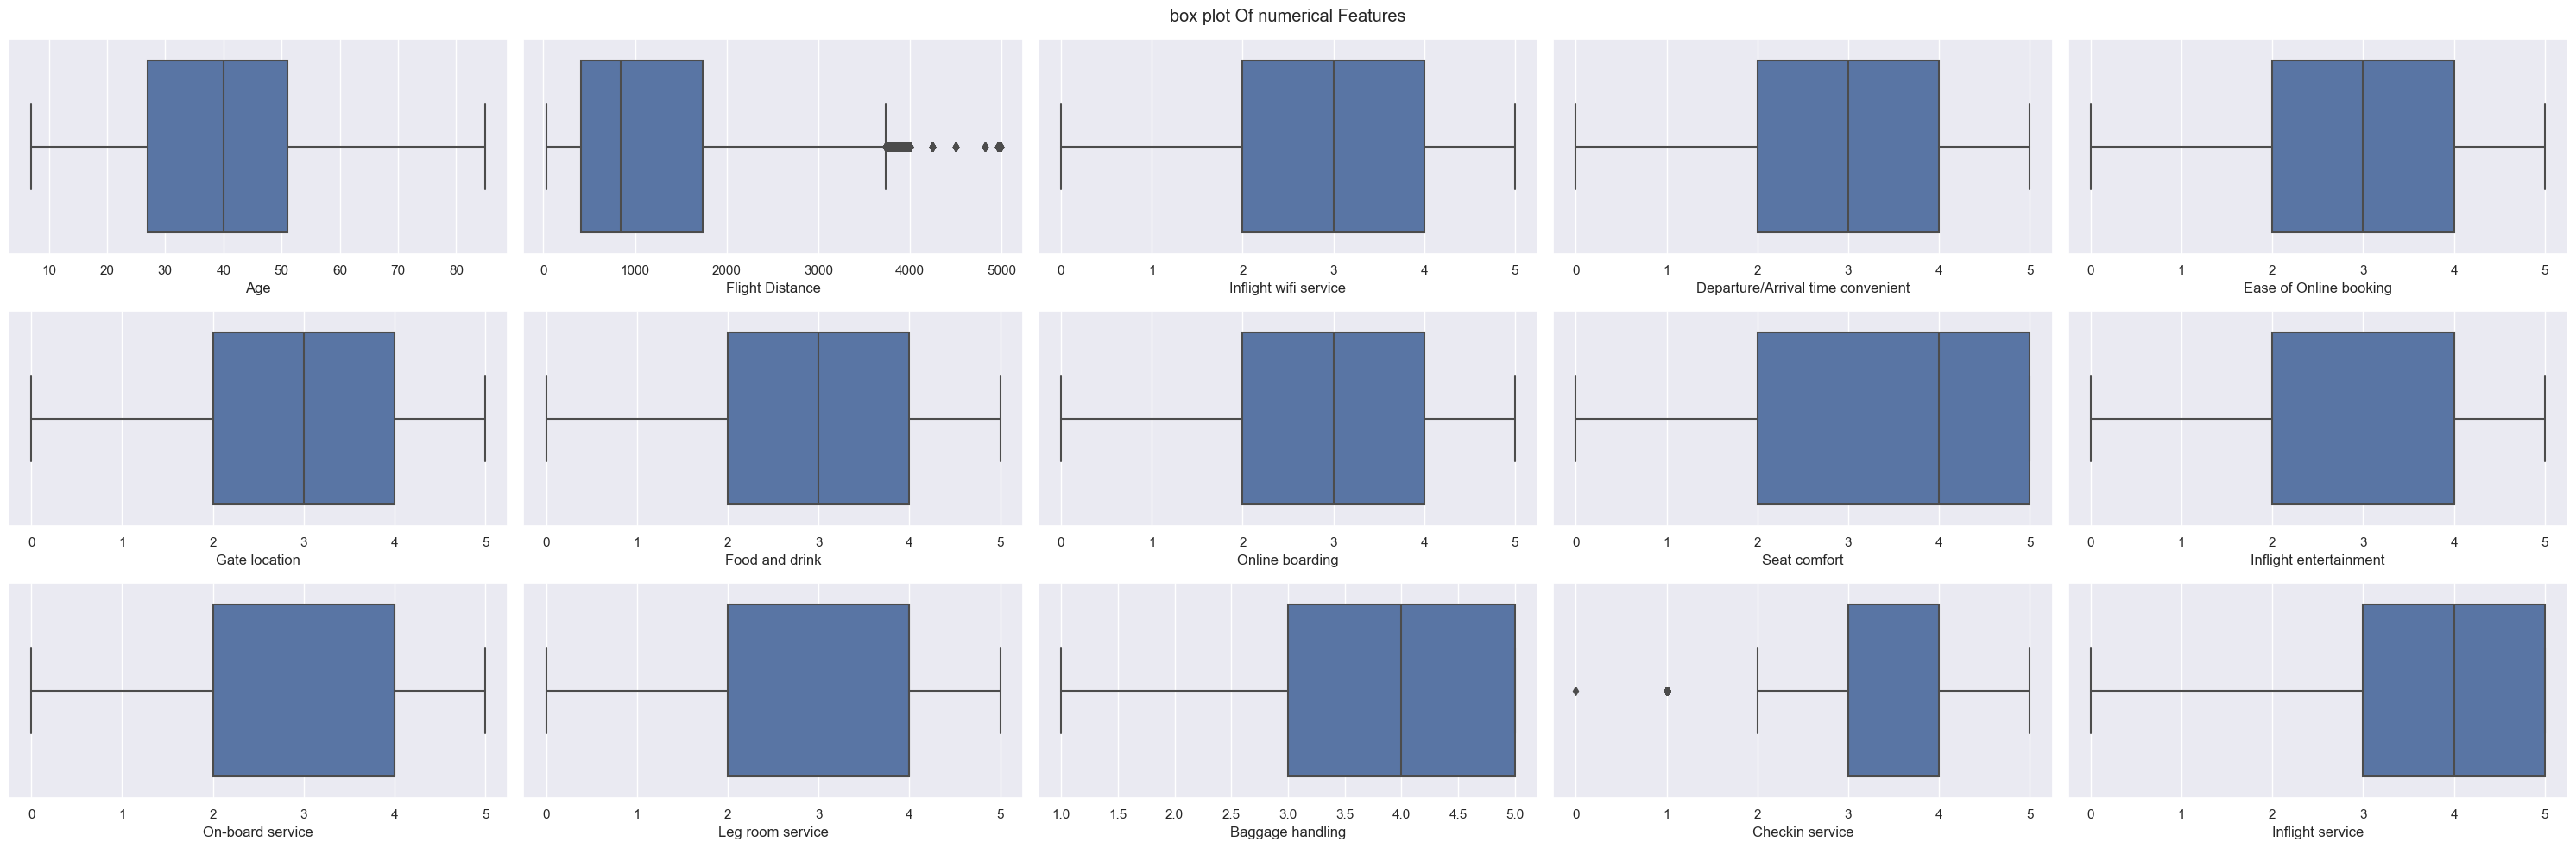

In [23]:
try:
    plt.figure(figsize=(30,10))
    plt.suptitle("box plot Of numerical Features")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,5,i+1)
        sns.boxplot(x = data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

In [24]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# define the categorical features
categorical_features = ['Gender', 'Customer Type',]

# loop through the categorical features and encode them
for feature in categorical_features:
    le.fit(data[feature])
    data[feature] = le.transform(data[feature])

<AxesSubplot:>

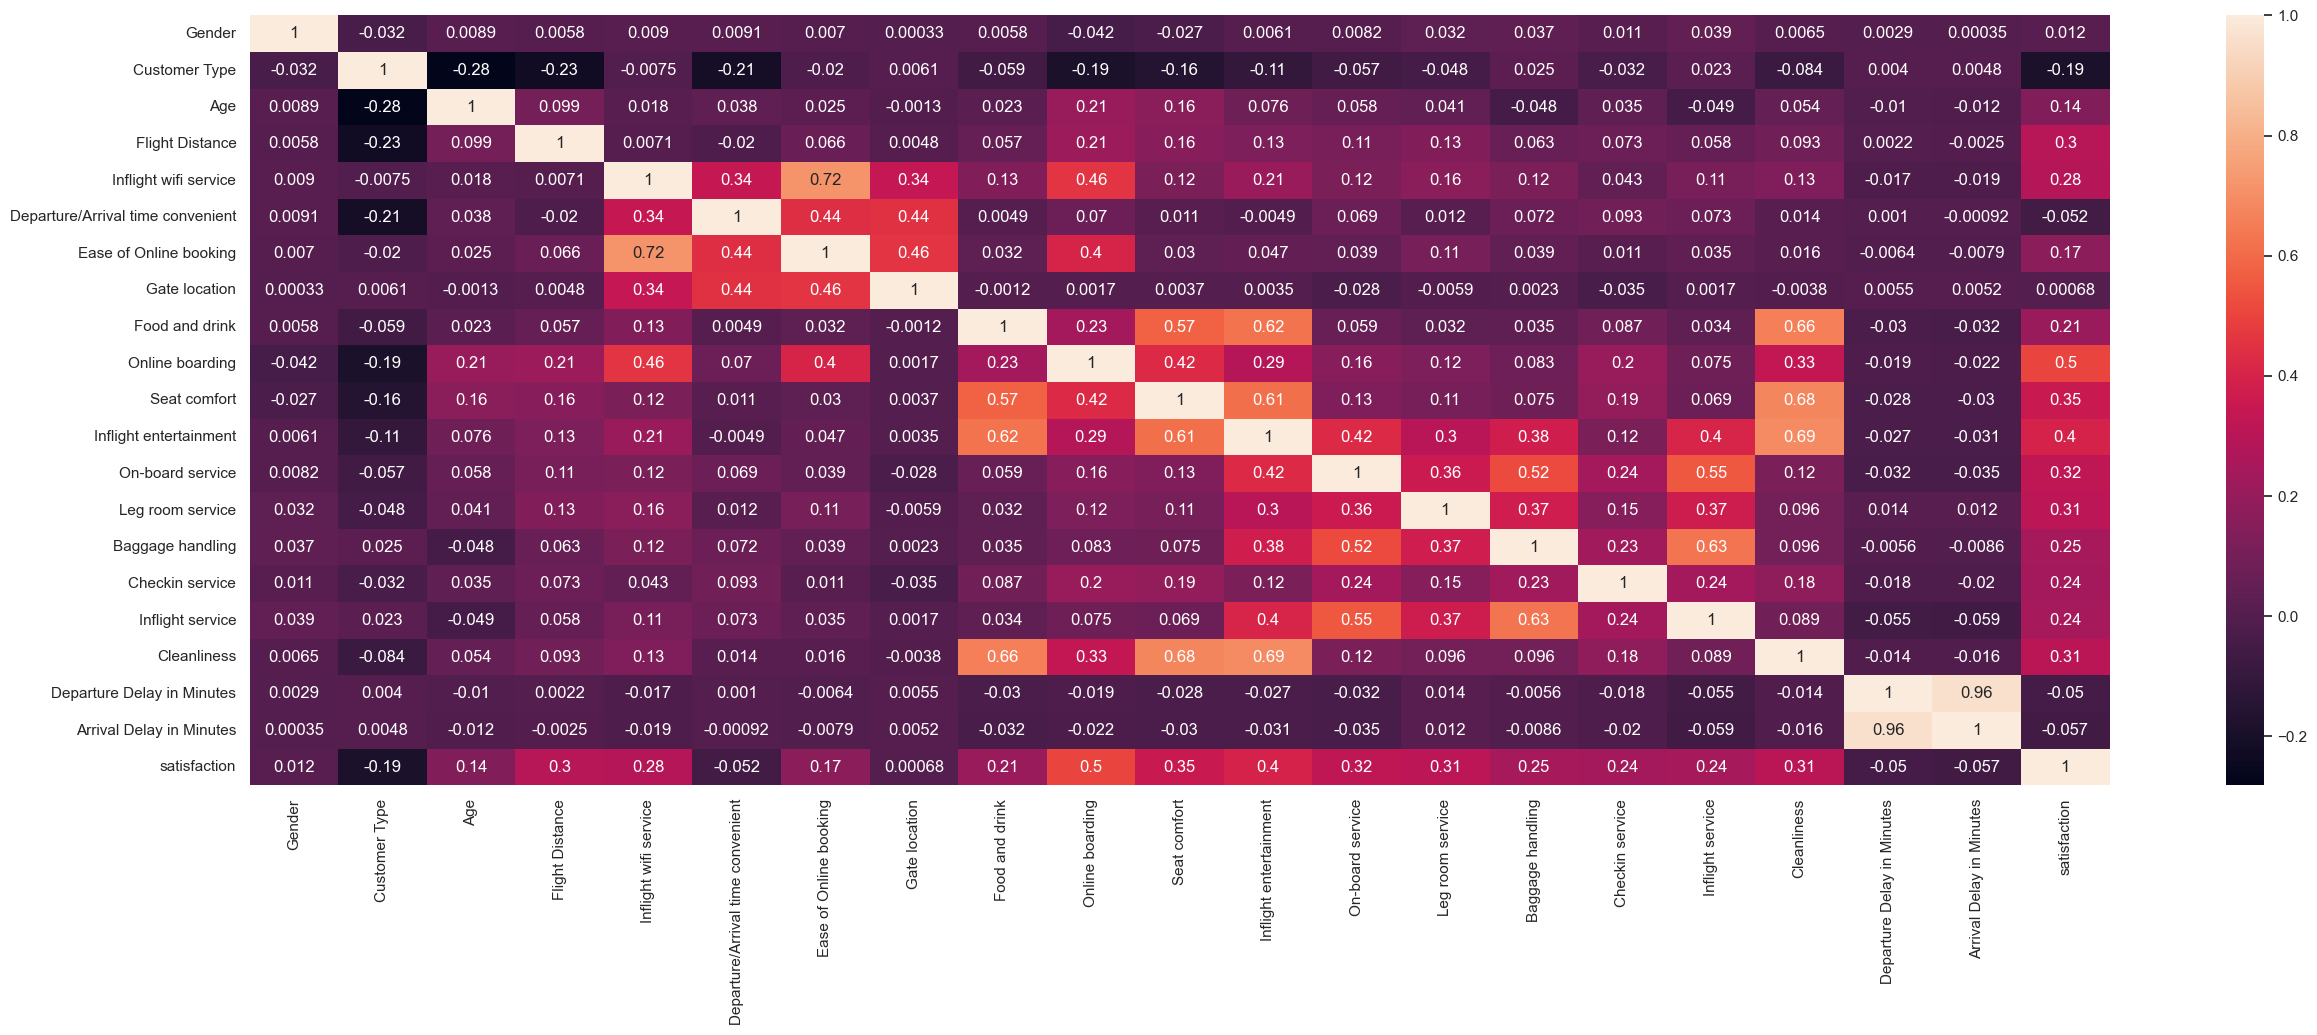

In [25]:
plt.figure(figsize=(30,10))
sns.heatmap(data.corr(),annot=True)

In [26]:
data.drop(['Departure/Arrival time convenient','Gate location','Arrival Delay in Minutes','Departure Delay in Minutes','Customer Type'],axis=1,inplace=True)

In [27]:
# Saprate numerical and catigorical data
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude ="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Type of Travel', 'Class'], dtype='object')
Index(['Gender', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Ease of Online booking', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness', 'satisfaction'],
      dtype='object')


## Model Traning

In [28]:
data.head()

,Gender,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,13,Personal Travel,Eco Plus,460,3,3,5,3,5,5,4,3,4,4,5,5,0
1,1,25,Business travel,Business,235,3,3,1,3,1,1,1,5,3,1,4,1,0
2,0,26,Business travel,Business,1142,2,2,5,5,5,5,4,3,4,4,4,5,1
3,0,25,Business travel,Business,562,2,5,2,2,2,2,2,5,3,1,4,2,0
4,1,61,Business travel,Business,214,3,3,4,5,5,3,3,4,4,3,3,3,1


In [29]:
data.shape

(103904, 18)

In [30]:
# saprate Dependent and indipendent fetures
x = data.drop("satisfaction",axis=1)
y = data["satisfaction"]

In [31]:
# Saprate numerical and catigorical data
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude ="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Type of Travel', 'Class'], dtype='object')
Index(['Gender', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Ease of Online booking', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness'],
      dtype='object')


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
# Pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [33]:
#Numerical Pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("onehote",OneHotEncoder()),
        ("scaler",StandardScaler(with_mean=False))
    ]
)

## Get Preprocessing Object
preprocessing = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
    
])

In [34]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(83123, 17)
(83123,)
(20781, 17)
(20781,)


In [36]:
# Transform Data usingPreprocessing Obj
X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.transform(X_test)

In [37]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [38]:
def performance_metrices(test,predict):
    confusionmetrix = print(f"CONFUSION_METRIX: {confusion_matrix(test,predict)}")
    pre = print(f"PRECISION_SCORE: {precision_score(test,predict)}")
    recall = print(f"RECALL_SCORE: {recall_score(test,predict)}")
    f1score = print(f"F1_SCORE: {f1_score(test,predict)}")
    accuracyscore = print(f"ACCURACY_SCORE: {accuracy_score(test,predict)}")
    return confusionmetrix,pre,recall,f1score,accuracyscore

In [39]:
logestic = LogisticRegression()

In [40]:
logestic.fit(X_train,y_train)

LogisticRegression()

In [41]:
logestic.score(X_train,y_train)

0.8590763086029137

In [42]:
y_predict = logestic.predict(X_test)

In [43]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[10398  1315]
 [ 1585  7483]]
PRECISION_SCORE: 0.850534212320982
RECALL_SCORE: 0.8252095280105867
F1_SCORE: 0.8376805104668084
ACCURACY_SCORE: 0.860449449015928


(None, None, None, None, None)

In [44]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     11713
           1       0.85      0.83      0.84      9068

    accuracy                           0.86     20781
   macro avg       0.86      0.86      0.86     20781
weighted avg       0.86      0.86      0.86     20781



In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
forest = RandomForestClassifier()

In [47]:
forest.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
forest.score(X_train,y_train)

1.0

In [49]:
y_pread = forest.predict(X_test)

In [50]:
performance_metrices(y_test,y_pread)

CONFUSION_METRIX: [[11424   289]
 [  607  8461]]
PRECISION_SCORE: 0.9669714285714286
RECALL_SCORE: 0.9330613145125717
F1_SCORE: 0.9497137725895162
ACCURACY_SCORE: 0.9568836918338868


(None, None, None, None, None)

In [51]:
print(classification_report(y_test,y_pread))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     11713
           1       0.97      0.93      0.95      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.95      0.96     20781
weighted avg       0.96      0.96      0.96     20781



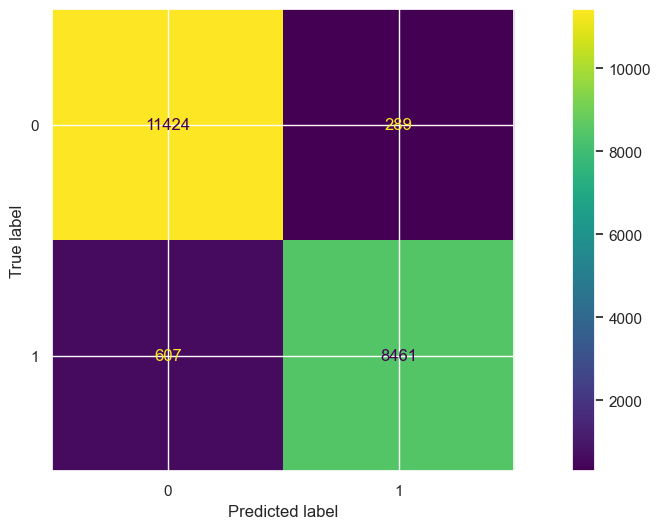

In [52]:
cm=confusion_matrix(y_test,y_pread)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [53]:
def model_evaluation(test,predict):
    accuracy = accuracy_score(test,predict)
    return accuracy

In [54]:
models = {
    "LogisticRegression":LogisticRegression(),
    "RandomForestClassifier":RandomForestClassifier()
}

model_list = []
y_predict_list = []
trainig_score = []


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    score = model.score(X_train,y_train)
    # Make Prediction
    y_pradict = model.predict(X_test)
    
    accuracy = model_evaluation(y_test,y_pradict)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Traning Performance")
    print("ACCURACY:",accuracy)
    print("="*40)
    y_predict_list.append(y_pradict)
    trainig_score.append(score)
                      

LogisticRegression
Model Traning Performance
ACCURACY: 0.860449449015928
RandomForestClassifier
Model Traning Performance
ACCURACY: 0.956546845676339


In [55]:
performance_metrices(y_test,y_predict_list[1])

CONFUSION_METRIX: [[11434   279]
 [  624  8444]]
PRECISION_SCORE: 0.9680155909664107
RECALL_SCORE: 0.9311865902073224
F1_SCORE: 0.9492439997751672
ACCURACY_SCORE: 0.956546845676339


(None, None, None, None, None)

In [56]:
data.to_csv("Clean Airline Passenger Satisfaction.csv",index=False)

In [61]:
data

,Gender,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,13,Personal Travel,Eco Plus,460,3,3,5,3,5,5,4,3,4,4,5,5,0
1,1,25,Business travel,Business,235,3,3,1,3,1,1,1,5,3,1,4,1,0
2,0,26,Business travel,Business,1142,2,2,5,5,5,5,4,3,4,4,4,5,1
3,0,25,Business travel,Business,562,2,5,2,2,2,2,2,5,3,1,4,2,0
4,1,61,Business travel,Business,214,3,3,4,5,5,3,3,4,4,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,23,Business travel,Eco,192,2,2,2,2,2,2,3,1,4,2,3,2,0
103900,1,49,Business travel,Business,2347,4,4,2,4,5,5,5,5,5,5,5,4,1
103901,1,30,Business travel,Business,1995,1,1,4,1,5,4,3,2,4,5,5,4,0
103902,0,22,Business travel,Eco,1000,1,1,1,1,1,1,4,5,1,5,4,1,0


In [66]:
data["Class"].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [ ]:
,
            
             
            
            'Inflight_service', 'Cleanliness']